In [3]:
# !source ../venv/bin/activate && python3 -m pip install -r ../requirements/requirements-viz.txt

# Demography with japandata.population

In [43]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
import folium
import branca.colormap as cm
from folium.features import GeoJsonTooltip

PLOT_FOLDER = os.path.join(os.getcwd(), "population/")
os.makedirs(PLOT_FOLDER, exist_ok=True)
output_filetypes = ["png"]

# National demographics

## Basic demographics with japan_pop

In [21]:
from japandata.population import japan_pop

japan_pop begins in 1967 with the number of `Japanese` `men`, `women`, and `households`.

In [22]:
japan_pop[japan_pop["year"] == 1967].dropna(axis=1, how="all")

,year,nationality,men,women,total-pop,households
0,1967,japanese,50361080,51626940,101988020,27115293


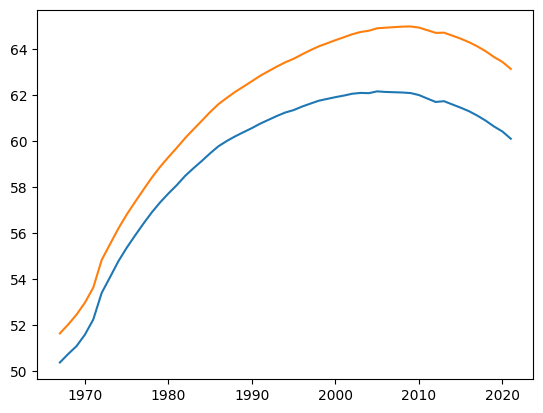

In [23]:
fig, ax = plt.subplots()
ax.plot(
    japan_pop.loc[japan_pop["nationality"] == "japanese", "year"],
    japan_pop.loc[japan_pop["nationality"] == "japanese", "men"] / 10**6,
    label="jp men",
)
ax.plot(
    japan_pop.loc[japan_pop["nationality"] == "japanese", "year"],
    japan_pop.loc[japan_pop["nationality"] == "japanese", "women"] / 10**6,
    label="jp women",
)
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER + "total_pop." + suffix, transparent=True)

In 1979 it begins to cover birth and death rates (`born-minus-died`) and all other population changes (`social-in-minus-social-out`)

In [24]:
japan_pop[japan_pop["year"] == 1979].dropna(axis=1, how="all")

,year,nationality,men,women,total-pop,households,births,deaths,births-minus-deaths,social-in-minus-social-out
12,1979,japanese,57323504,58871394,116194898,35830857,1624659.0,707507.0,917152.0,-9029.0


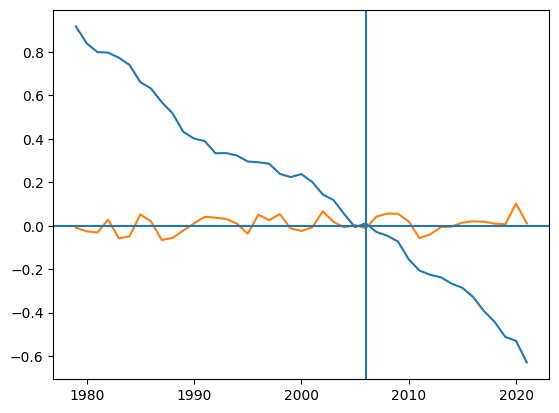

In [25]:
fig, ax = plt.subplots()
ax.plot(
    japan_pop.loc[japan_pop["nationality"] == "japanese", "year"],
    japan_pop.loc[japan_pop["nationality"] == "japanese", "births-minus-deaths"] / 10**6,
    label="birth minus death",
)
ax.plot(
    japan_pop.loc[japan_pop["nationality"] == "japanese", "year"],
    japan_pop.loc[japan_pop["nationality"] == "japanese", "social-in-minus-social-out"]
    / 10**6,
    label="social-in-minus-social-out",
)
ax.axhline(0)
ax.axvline(2006)
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER + "total_pop." + suffix, transparent=True)

In 2012 data about `non-japanese` residents becomes available

In [26]:
japan_pop[japan_pop["year"] == 2012].dropna(axis=1, how="all")

,year,nationality,men,women,total-pop,households,births,deaths,births-minus-deaths,social-in-minus-social-out,households-singlecitizenship,households-multicitizenship
45,2012,all,62588804,65785075,128373879,55577563,1039574.0,1260777.0,-221203.0,1935399.0,NaN,NaN
55,2012,japanese,61694085,64699594,126393679,54594744,1029433.0,1255551.0,-226118.0,-39886.0,54166316.0,428428.0
65,2012,non-japanese,894719,1085481,1980200,982819,10141.0,5226.0,4915.0,1975285.0,NaN,NaN


In [27]:
non_japanese_fraction = (
    japan_pop.loc[japan_pop["nationality"] == "non-japanese"].set_index("year")[
        "total-pop"
    ]
    / japan_pop.loc[japan_pop["nationality"] == "japanese"].set_index("year")[
        "total-pop"
    ]
).dropna()

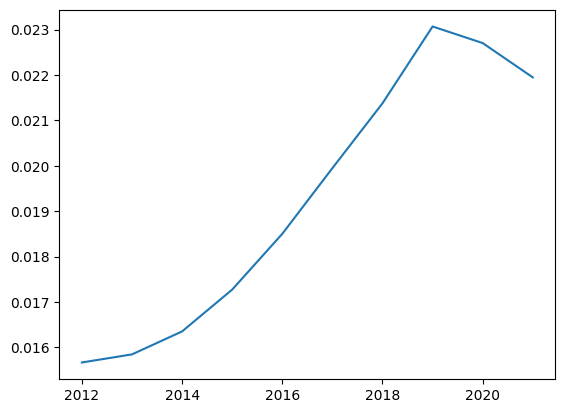

In [28]:
fig, ax = plt.subplots()
ax.plot(
    non_japanese_fraction.index,
    non_japanese_fraction.values,
    label="foreign population fraction",
)
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER + "total_pop." + suffix, transparent=True)

## Age distributions with japan_age

In [29]:
from japandata.population import japan_age

japan_age begins in 1993 and provides age distributions for `men` and `women` for Japanese people in Japan.

In [30]:
japan_age[japan_age["year"] == 1993].dropna(axis=1, how="all")

,year,nationality,gender,total-pop,0-4,5-9,10-14,15-19,20-24,25-29,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,>79,unknown
0,1993,japanese,total,124322801,5999436,6824744,7661262,8911522,9773743,8542723,...,9855717,9717145,8931630,7902202,7274968,6112329,4383023,3146144,3597831.0,14
1,1993,japanese,men,61086642,3073971,3495553,3923919,4553643,4991314,4360891,...,4979281,4884561,4435626,3875321,3504273,2829758,1754580,1222594,1227294.0,7
2,1993,japanese,women,63236159,2925465,3329191,3737343,4357879,4782429,4181832,...,4876436,4832584,4496004,4026881,3770695,3282571,2628443,1923550,2370537.0,7


<Axes: xlabel='men'>

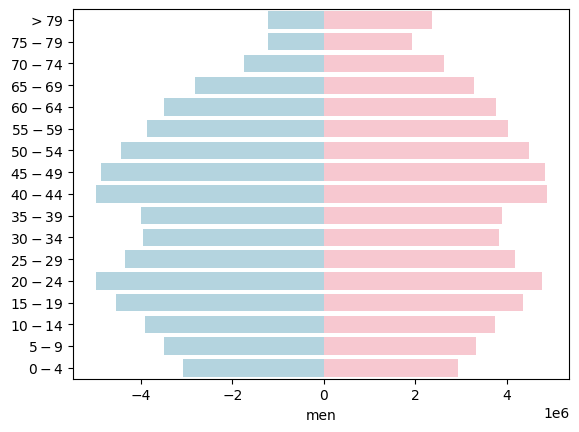

In [31]:
ja_for_plot = (
    japan_age.loc[japan_age["year"] == 1993]
    .dropna(axis=1, how="all")
    .drop(["year", "nationality", "unknown", "total-pop"], axis=1, errors="ignore")
).set_index("gender")

ageranges = ja_for_plot.columns
sortinds = np.argsort(
    [int(agerange.split("-")[0].split(">")[-1]) for agerange in ageranges]
)[::-1]
ageranges = np.array([r"$" + agerange + "$" for agerange in ageranges])

fig, ax = plt.subplots()
sns.barplot(
    x=ja_for_plot.loc["women"],
    y=ageranges,
    order=ageranges[sortinds],
    color="pink",
    ax=ax,
)  # 
sns.barplot(
    x=-ja_for_plot.loc["men"],
    y=ageranges,
    order=ageranges[sortinds],
    color="lightblue",
    ax=ax,
)  
#ax.set_xlim([-6 * 10**6, 6 * 10**6])

In 2012 data about `non-japanese` residents becomes available

<Axes: xlabel='men'>

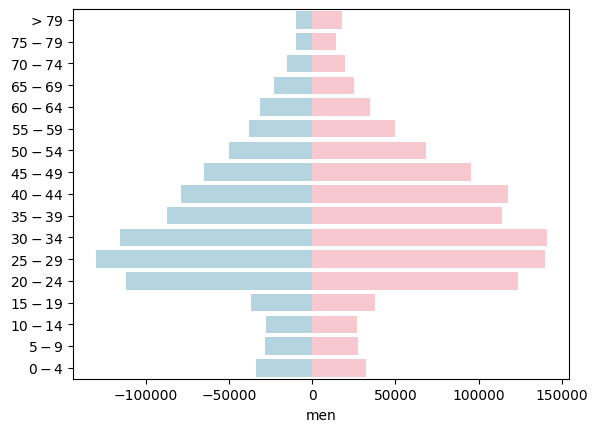

In [32]:
ja_for_plot = (
    japan_age.loc[(japan_age["year"] == 2012) & (japan_age['nationality'] == 'non-japanese')]
    .dropna(axis=1, how="all")
    .drop(["year", "nationality", "unknown", "total-pop"], axis=1, errors="ignore")
).set_index("gender")

ageranges = ja_for_plot.columns
sortinds = np.argsort(
    [int(agerange.split("-")[0].split(">")[-1]) for agerange in ageranges]
)[::-1]
ageranges = np.array([r"$" + agerange + "$" for agerange in ageranges])

fig, ax = plt.subplots()
sns.barplot(
    x=ja_for_plot.loc["women"],
    y=ageranges,
    order=ageranges[sortinds],
    color="pink",
    ax=ax,
)
sns.barplot(
    x=-ja_for_plot.loc["men"],
    y=ageranges,
    order=ageranges[sortinds],
    color="lightblue",
    ax=ax,
)
#ax.set_xlim([-6 * 10**6, 6 * 10**6])

In `2014` the binning becomes more precise at the older end 

<Axes: xlabel='men'>

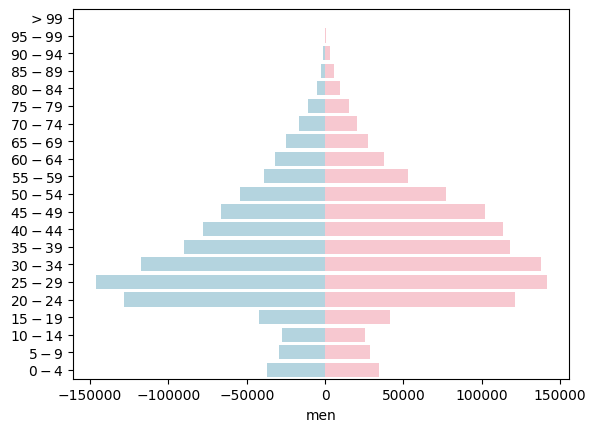

In [33]:
ja_for_plot = (
    japan_age.loc[(japan_age["year"] == 2014) & (japan_age['nationality'] == 'non-japanese')]
    .dropna(axis=1, how="all")
    .drop(["year", "nationality", "unknown", "total-pop"], axis=1, errors="ignore")
).set_index("gender")

ageranges = ja_for_plot.columns
sortinds = np.argsort(
    [int(agerange.split("-")[0].split(">")[-1]) for agerange in ageranges]
)[::-1]
ageranges = np.array([r"$" + agerange + "$" for agerange in ageranges])

fig, ax = plt.subplots()
sns.barplot(
    x=ja_for_plot.loc["women"],
    y=ageranges,
    order=ageranges[sortinds],
    color="pink",
    ax=ax,
)
sns.barplot(
    x=-ja_for_plot.loc["men"],
    y=ageranges,
    order=ageranges[sortinds],
    color="lightblue",
    ax=ax,
)
#ax.set_xlim([-6 * 10**6, 6 * 10**6])

In [34]:
total_pop_from_pop_df = japan_pop[["year", "nationality", "total-pop"]]
total_pop_from_age_df = japan_age.loc[japan_age['gender'] == 'total', ["year", "nationality", "total-pop"]]
total_pop = total_pop_from_age_df.merge(total_pop_from_pop_df, on=["year", "nationality"], how='left', suffixes=('_age','_pop'))
assert(total_pop['total-pop_age'].equals(total_pop['total-pop_pop']))

# Prefectural and municipal demographics

All this data is also available at the prefectural and municipal level

In [35]:
from japandata.population import pref_pop, pref_age, city_pop, city_age

The prefectural data covers the same year ranges as the national data, while the municipal data begins in 1994.
Be aware that the local population dataframes contains rows for both designated cities and subcomponents.

In [36]:
year = 2021
nationality = 'all'

In [58]:
df = city_pop[(city_pop['year'] == year) & (city_pop['nationality'] == 'all')].copy()
df['birth-minus-deaths-rate'] = df['births-minus-deaths']/df['total-pop']*1000

In [59]:
from japandata.maps import add_df_to_map

In [60]:
df = add_df_to_map(df, year, 'jp_city_dc', 'stylized', clean=True)

/Users/sam/Projects/civic/japandata/venv/lib/python3.10/site-packages/topojson/core/dedup.py:107: RuntimeWarning: invalid value encountered in cast
  data["bookkeeping_shared_arcs"] = array_bk_sarcs.astype(np.int64).tolist()


0 failures


In [68]:
######################
### Map Styling ######
######################

unhighlighted_style = {
    "color": "grey",
    "weight": .5,
    "fillOpacity": 1,
}

highlighted_style = unhighlighted_style | {"weight": 4}

tooltipstyle = """
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """


def fillColor(colormap, feature):
    try:
        return colormap(feature["properties"]["_dummy"])
    except (ValueError, KeyError, TypeError):
        return "black"


map_style = {
    "zoom_start": 5,
    "tiles": "None",
    "attr": " ",
}

In [77]:
datacolumn = "birth-minus-deaths-rate"
datacolumnalias = "Natural population change per 1000 people"
scalingfactor = 1


df["_dummy"] = df[datacolumn] / scalingfactor
# maximum_dev = np.max(np.abs(df["_dummy"]))
maximum_dev = 20
rgbacolors = matplotlib.colormaps["coolwarm"](np.linspace(0, 1, 11))
colormap = cm.LinearColormap(
    [matplotlib.colors.to_hex(color) for color in rgbacolors], vmin=-maximum_dev, vmax=maximum_dev
)

In [ ]:
m = folium.Map(**map_style | {"location": [35.67, 139]})

tooltip = GeoJsonTooltip(
    fields=["prefecture", "city", "_dummy"],
    aliases=["Prefecture:", "City:", datacolumnalias + ":"],
    localize=True,
    sticky=False,
    labels=True,
    style=tooltipstyle,
    max_width=800,
)

folium.GeoJson(
    df,
    name="_dummy",
    style_function=lambda feature: {"fillColor": fillColor(colormap, feature)}
    | unhighlighted_style,
    highlight_function=lambda feature: {"fillColor": fillColor(colormap, feature)}
    | highlighted_style,
    zoom_on_click=True,
    tooltip=tooltip,
).add_to(m)

colormap.caption = datacolumnalias
try:
    colormap.add_to(m)
except AttributeError:
    pass

m.save(PLOT_FOLDER + "decline.html")
m